In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('PlantVillage',shuffle=True,
                                                           image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE,)

Found 2475 files belonging to 2 classes.


In [4]:
class_names=dataset.class_names
class_names

['Pepper Leaf Bacterial Spot', 'Pepper Leaf healthy']

In [5]:
len(dataset)

78

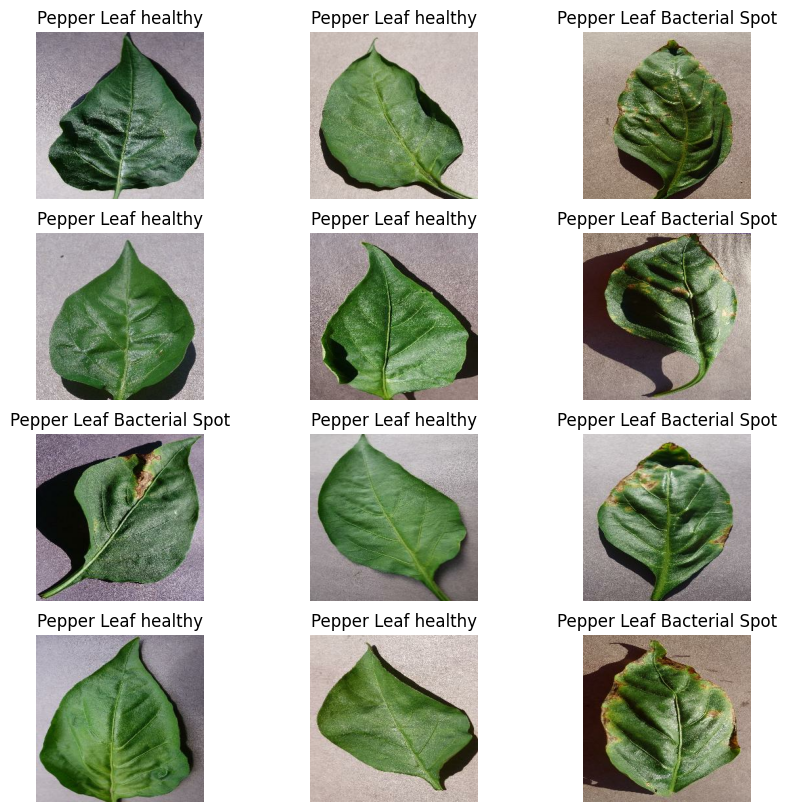

In [6]:
plt.figure(figsize=(10,10))

for image,label in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(4,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')
        

In [7]:
len(dataset)

78

In [8]:
train_size=0.8
len(dataset)*train_size

62.400000000000006

In [9]:
train_ds=dataset.take(54)
len(train_ds)

54

In [10]:
test_ds=dataset.skip(54)
len(test_ds)

24

In [11]:
val_size=0.1
len(dataset)*val_size

7.800000000000001

In [12]:
val_ds=test_ds.take(6)
len(val_ds)

6

In [13]:
test_ds=test_ds.skip(6)
len(test_ds)

18

In [14]:
def splitds(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    
    return train_ds,val_ds,test_ds

In [15]:
train_ds,val_ds,test_ds=splitds(dataset)

In [16]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
Resing_and_rescaling=tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255),
])

In [18]:
data_augmentation=tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
])

In [19]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=2

model=models.Sequential([
    Resing_and_rescaling,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPool2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='sigmoid'),
       
])

model.build(input_shape=input_shape)

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [20]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 2)                     │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,682 (717.51 KB)

 Trainable params: 183,682 (717.51 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(
   optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']

)

In [22]:
history=model.fit(
  train_ds,
  epochs=EPOCHS,
  batch_size=BATCH_SIZE,
  verbose=1,
  validation_data=val_ds
)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 75s 979ms/step - accuracy: 0.5921 - loss: 0.6502 - val_accuracy: 0.7321 - val_loss: 0.6114
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 53s 858ms/step - accuracy: 0.9110 - loss: 0.3186 - val_accuracy: 0.9554 - val_loss: 0.1144
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 47s 764ms/step - accuracy: 0.9553 - loss: 0.1557 - val_accuracy: 0.8304 - val_loss: 0.6085
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 44s 708ms/step - accuracy: 0.9678 - loss: 0.1402 - val_accuracy: 0.9152 - val_loss: 0.2224
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 44s 704ms/step - accuracy: 0.9829 - loss: 0.0688 - val_accuracy: 0.9911 - val_loss: 0.0246
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 46s 747ms/step - accuracy: 0.9813 - loss: 0.0562 - val_accuracy: 0.9464 - val_loss: 0.1155
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 49s 793ms/step - accuracy: 0.9917 - loss: 0.0347 - val_accuracy: 0.9911 - val_loss: 0.0197
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 46s 744ms/step - accuracy: 0.9904 - loss: 0.0326 - val_accu

In [23]:
score=model.evaluate(test_ds)

9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.9510 - loss: 0.1429


In [24]:
score

[0.10820958018302917, 0.9618055820465088]

In [25]:
history

In [26]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [29]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'training and validation loss')

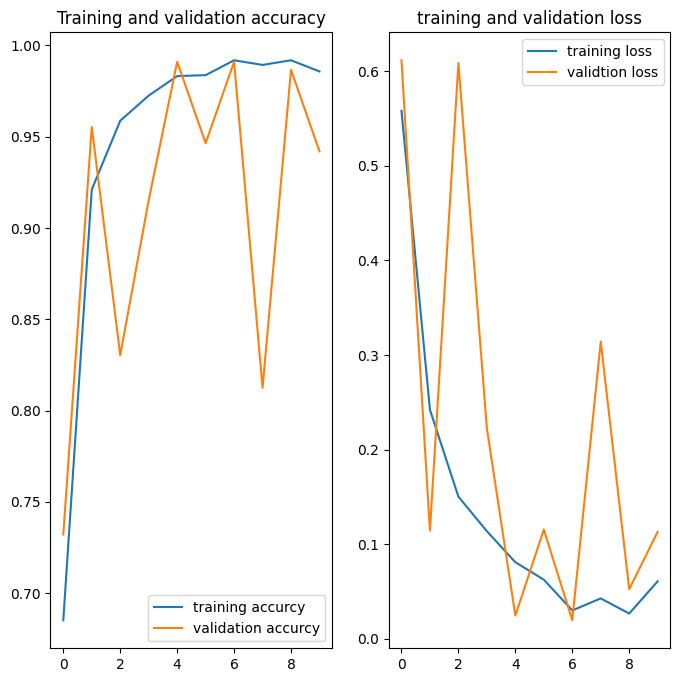

In [30]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='training accurcy')
plt.plot(range(EPOCHS),val_acc,label='validation accurcy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')


plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='training loss')
plt.plot(range(EPOCHS),val_loss,label='validtion loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')

first image to predict
first image actual label: Pepper Leaf healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
Pepper Leaf healthy


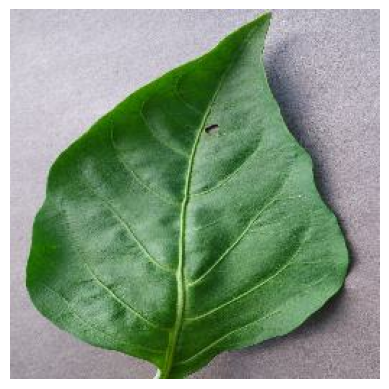

In [31]:
import numpy as np

for image,label in test_ds.take(1):
    first_image=image[0].numpy().astype('uint8')
    first_image_label=label[0].numpy()
    
    print('first image to predict')
    plt.imshow(first_image)
    print('first image actual label:', class_names[first_image_label])
    plt.axis('off')
    
    prediction=model.predict(image)
    print(class_names[np.argmax(prediction[0])])
    

In [32]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(image[i].numpy())
    img_array=tf.expand_dims(img_array,0) ##create a batch
    
    prediction=model.predict(img_array)
    
    predicted_class=class_names[np.argmax(prediction[0])]
    confidence=round(100*(np.max(prediction[0])),2)
    return predicted_class,confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


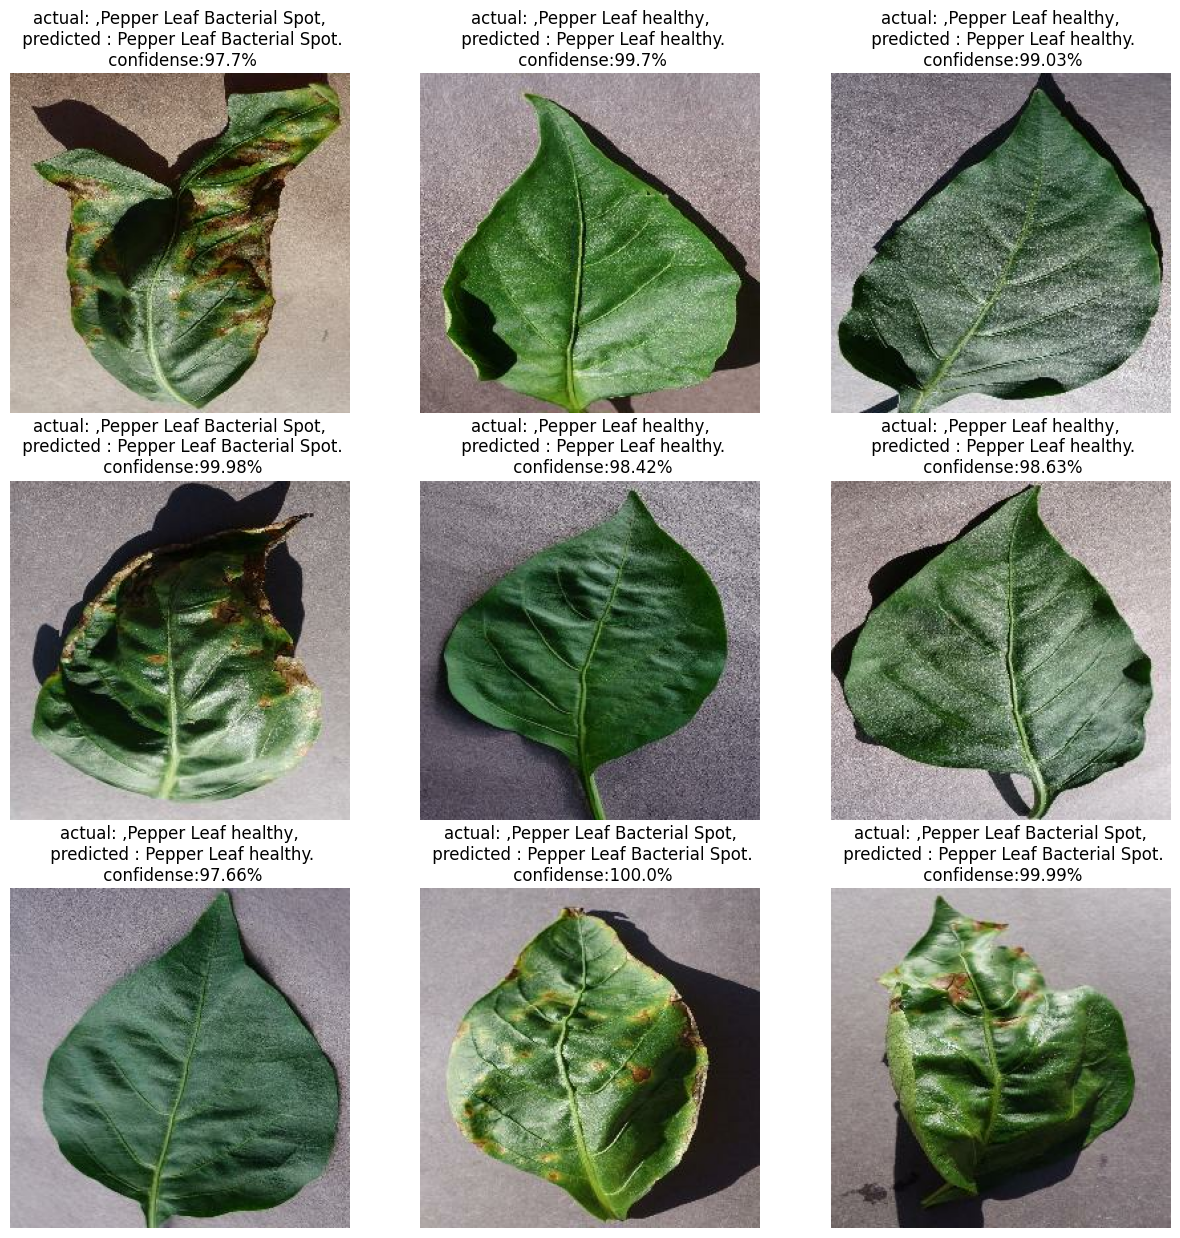

In [33]:
plt.figure(figsize=(15,15))
for image,label in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        predicted_class,confidence=predict(model, image[i].numpy())
        actual_class=class_names[label[i]]
        plt.title(f"actual: ,{actual_class},\n predicted : {predicted_class}.\n confidense:{confidence}%")                         
        plt.axis('off')
        

In [34]:
model_version = 3
model.save(f"model/{model_version}.keras")